In [1]:
import ROOT as r

Welcome to JupyROOT 6.18/04


In [2]:
MCTO      = False
if MCTO:
    MCtype = 'MCTrackerOnly'
else:
    MCtype = 'MCfull'

In [3]:
def GetFile2Check(ch, MCcat):
    fname = "TemplateFiles/Histos_"+ch+"_"+MCcat+"_LbCorr_FFGstate_FFEstateL_FFEstateH.root"
    print(fname)
    f = r.TFile(fname,'READ')
    return f

In [4]:
def GetFileNoFF(ch,MCcat):
    fname = "TemplateFiles/Histos_"+ch+"_"+MCcat+"_LbCorr_NoFFcorr.root"
    f = r.TFile(fname,'READ')
    return f

In [5]:
def PlotTemplates(h,name):
    h.SetLineColor(r.kAzure-3)
    c = r.TCanvas(name,'',1500,500)
    c.Divide(3,1)
    c.cd(1)
    h.ProjectionX().Draw('hist')
    c.cd(2)
    h.ProjectionY().Draw('hist')
    c.cd(3)
    h.ProjectionZ().Draw('hist')
    return c

In [6]:
def PlotTemplatesSameCanvas(c,h,color):
    h.SetLineColor(color)
    c.cd(1)
    h.ProjectionX().Draw('hist same')
    c.cd(2)
    h.ProjectionY().Draw('hist same')
    c.cd(3)
    h.ProjectionZ().Draw('hist same')
    return c

In [7]:
def GetHisto(f,sample,FFcorr):
    h = f.Get('h_'+sample)
    if(FFcorr):
        name = h.GetName()
        name +="_FFcorr"
        h.SetName(name)
    return h

In [8]:
def ScaleHisto(h,value):
    scale = value/h.Integral()
    h.Scale(scale)
    return h

In [9]:
mcsamples = ['Lb_Lcmunu','Lb_Lctaunu','Lb_Lc2625munu','Lb_Lc2625taunu','Lb_Lc2593munu','Lb_Lc2593taunu']

In [10]:
f2Check = GetFile2Check('Isolated', MCtype)
fNoFF = GetFileNoFF('Isolated', MCtype)

TemplateFiles/Histos_Isolated_MCfull_LbCorr_FFGstate_FFEstateL_FFEstateH.root


Info in <TCanvas::Print>: png file plots/TemplateFFChecks/FitVars_Lb_Lcmunu_iso.png has been created
Info in <TCanvas::Print>: png file plots/TemplateFFChecks/FitVars_Lb_Lctaunu_iso.png has been created
Info in <TCanvas::Print>: png file plots/TemplateFFChecks/FitVars_Lb_Lc2625munu_iso.png has been created
Info in <TCanvas::Print>: png file plots/TemplateFFChecks/FitVars_Lb_Lc2625taunu_iso.png has been created
Info in <TCanvas::Print>: png file plots/TemplateFFChecks/FitVars_Lb_Lc2593munu_iso.png has been created
Info in <TCanvas::Print>: png file plots/TemplateFFChecks/FitVars_Lb_Lc2593taunu_iso.png has been created


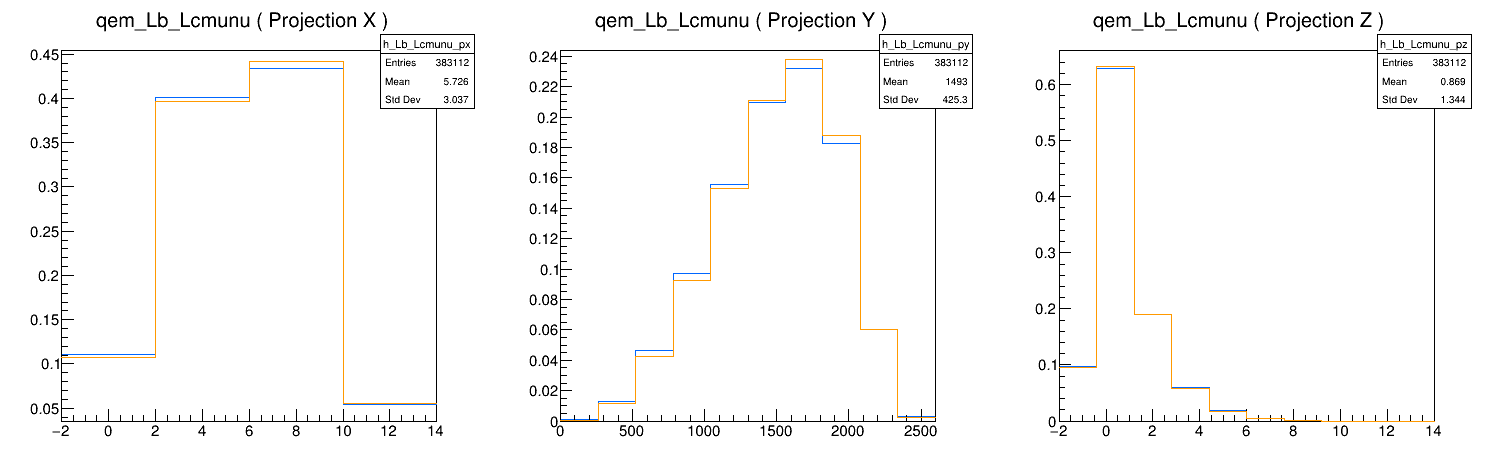

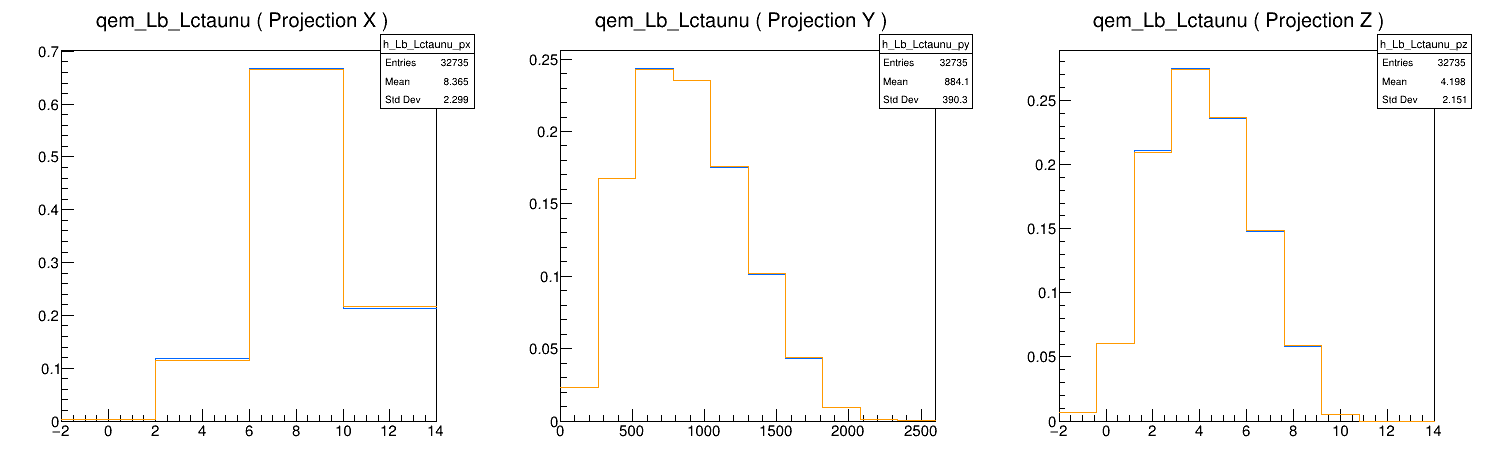

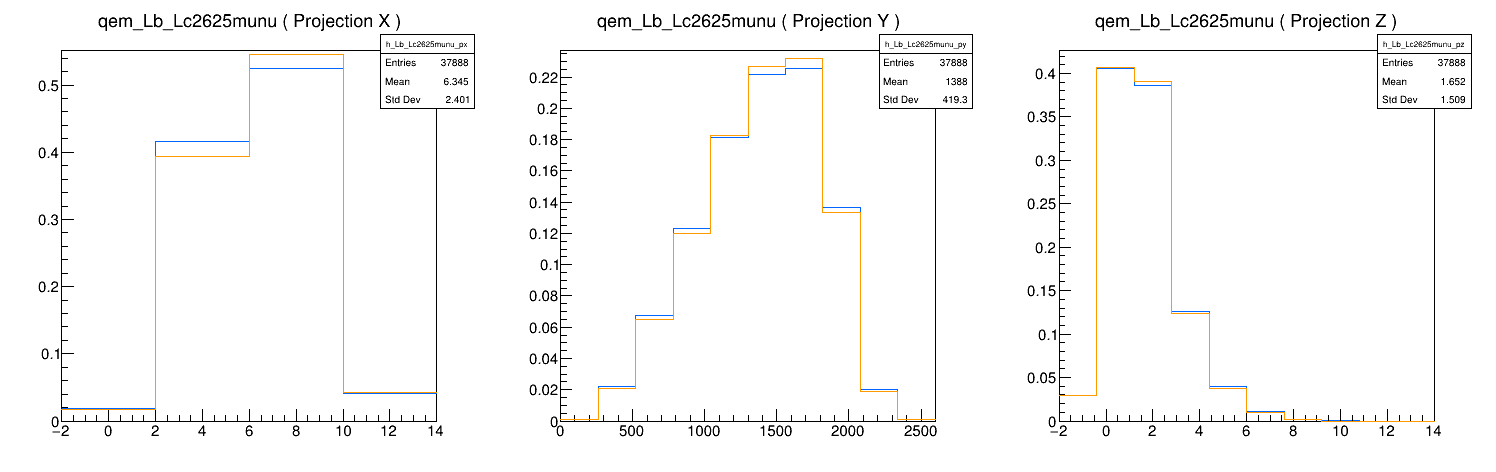

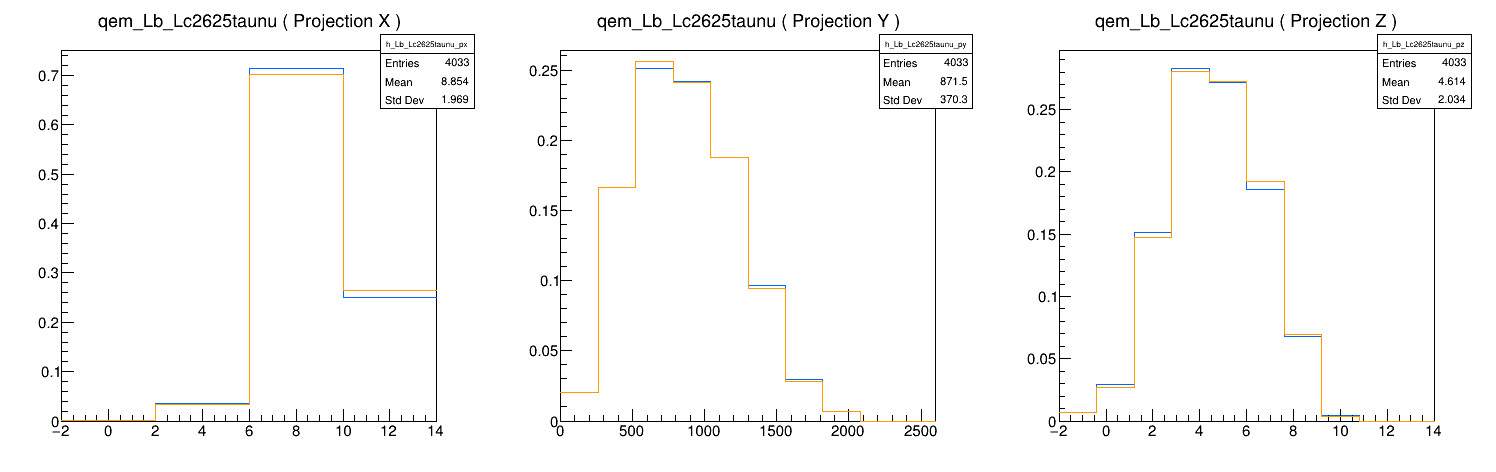

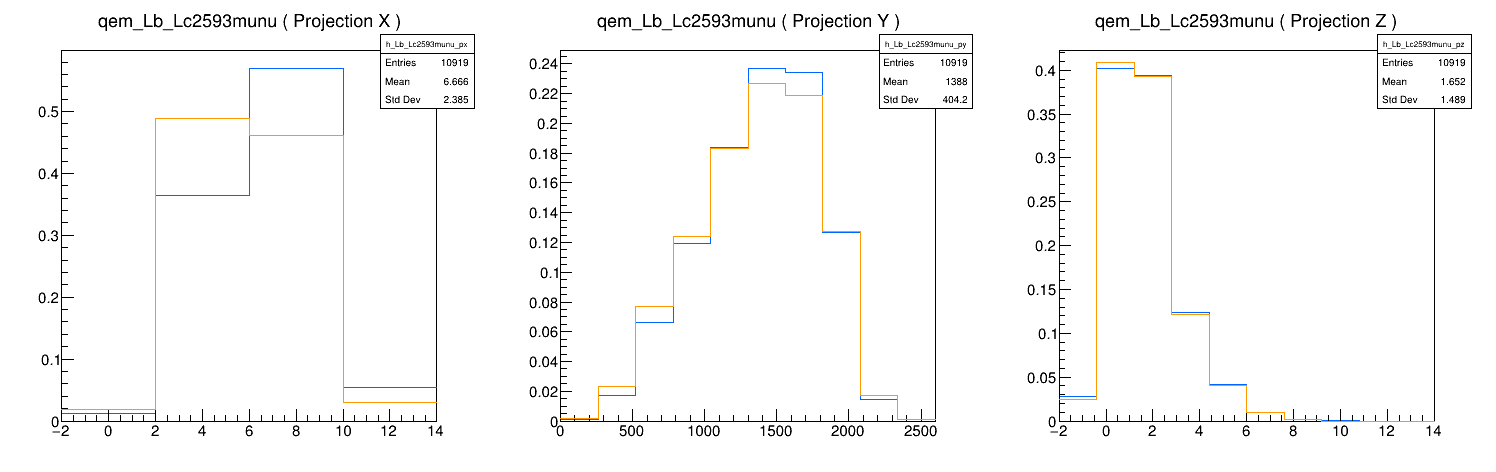

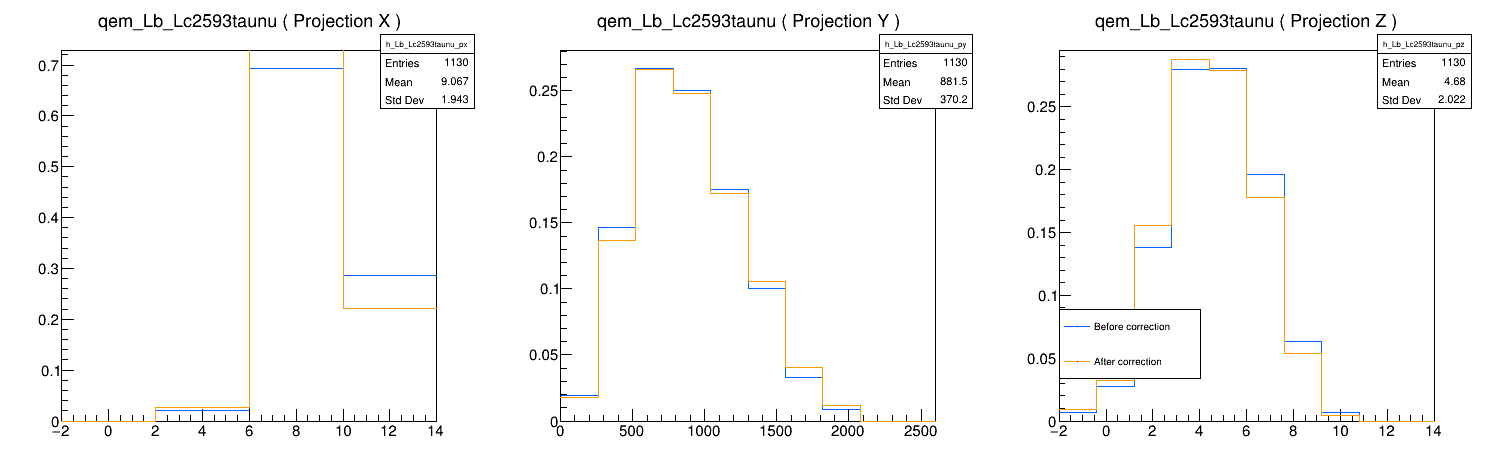

In [11]:
h2Check = {}
hNoFF = {}
c = {}

for mcsample in mcsamples:
    h2Check[mcsample] = GetHisto(f2Check,mcsample,True)
    h2Check[mcsample] = ScaleHisto(h2Check[mcsample],1)
    hNoFF[mcsample] = GetHisto(fNoFF,mcsample,False)
    hNoFF[mcsample] = ScaleHisto(hNoFF[mcsample],1)
    c[mcsample] = PlotTemplates(hNoFF[mcsample],'c_'+mcsample)
    c[mcsample] = PlotTemplatesSameCanvas(c[mcsample],h2Check[mcsample],r.kOrange-3)
    l = r.TLegend()
    l.AddEntry(hNoFF[mcsample],'Before correction')
    l.AddEntry(h2Check[mcsample],'After correction')
    l.Draw('same')
    c[mcsample].Draw()
    plotdir = 'plots/TemplateFFChecks/FitVars_'+mcsample+'_iso'
    c[mcsample].SaveAs(plotdir+'.png')

In [18]:
h2Check['Lb_Lcmunu'] = GetHisto(f2Check,'Lb_Lcmunu',True)
hX = h2Check['Lb_Lcmunu'].ProjectionX("projX")
print(h2Check['Lb_Lcmunu'].Integral(),hX.GetEntries())

276561.49546451523 383682.7000358361


In [12]:
f2Check = GetFile2Check('Kenriched', MCtype)
fNoFF = GetFileNoFF('Kenriched', MCtype)

TemplateFiles/Histos_Kenriched_MCfull_LbCorr_FFGstate_FFEstateL_FFEstateH.root


Info in <TCanvas::Print>: png file plots/TemplateFFChecks/FitVars_Lb_Lcmunu_Kenr.png has been created
Info in <TCanvas::Print>: png file plots/TemplateFFChecks/FitVars_Lb_Lctaunu_Kenr.png has been created
Info in <TCanvas::Print>: png file plots/TemplateFFChecks/FitVars_Lb_Lc2625munu_Kenr.png has been created
Info in <TCanvas::Print>: png file plots/TemplateFFChecks/FitVars_Lb_Lc2625taunu_Kenr.png has been created
Info in <TCanvas::Print>: png file plots/TemplateFFChecks/FitVars_Lb_Lc2593munu_Kenr.png has been created
Info in <TCanvas::Print>: png file plots/TemplateFFChecks/FitVars_Lb_Lc2593taunu_Kenr.png has been created


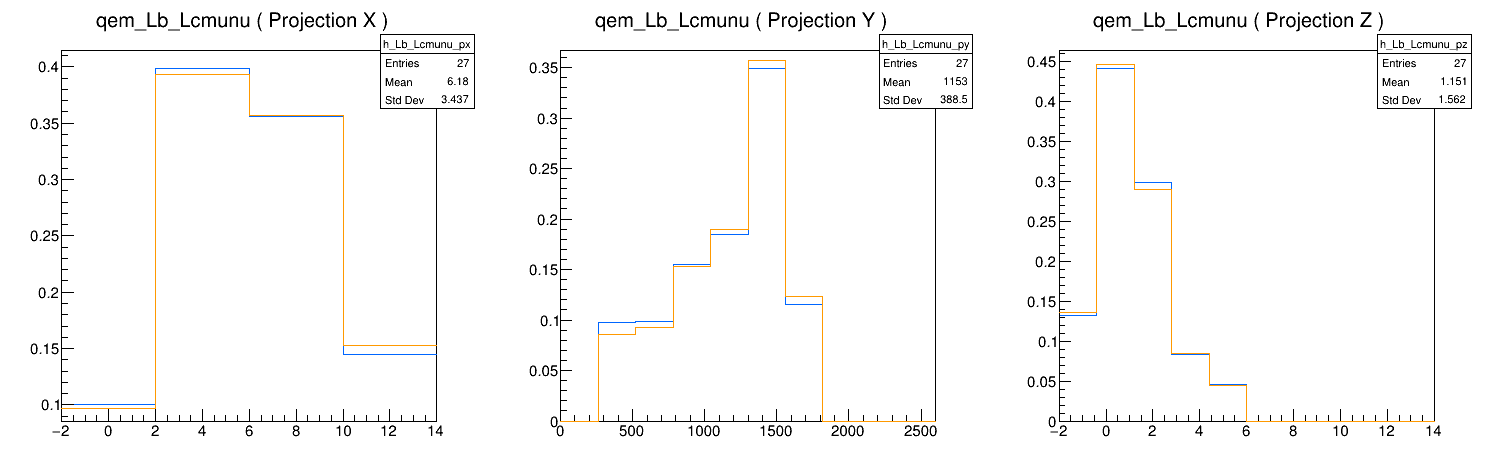

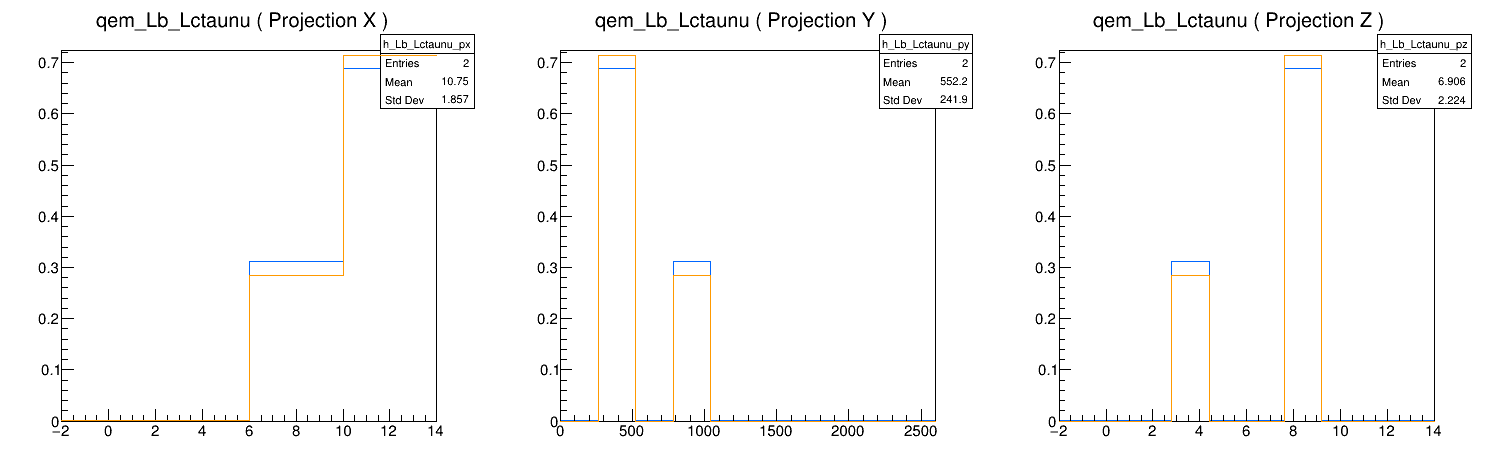

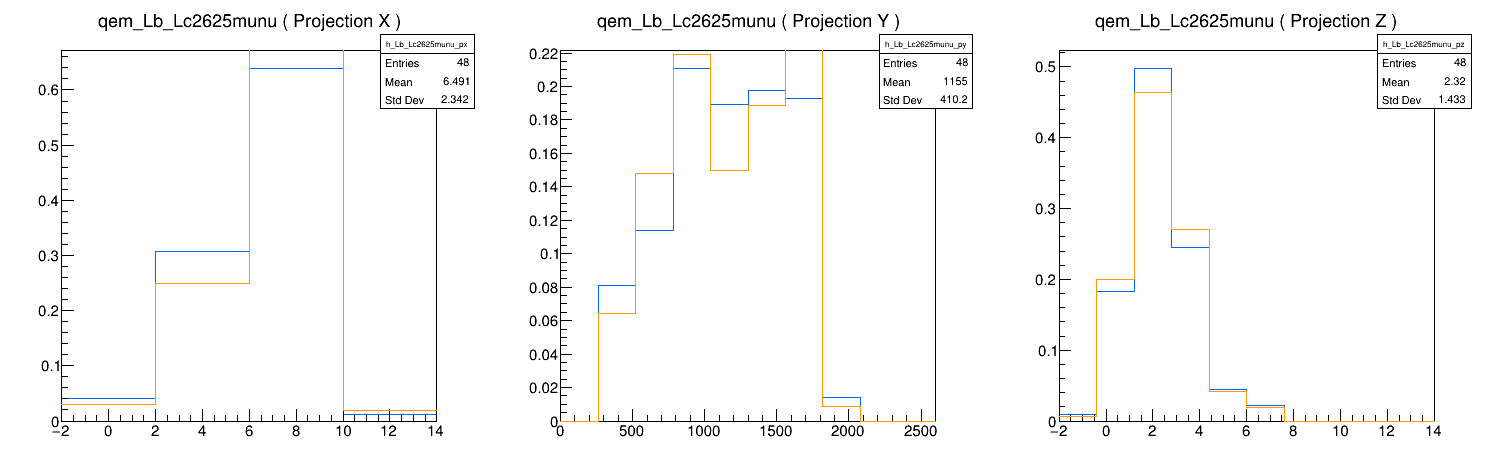

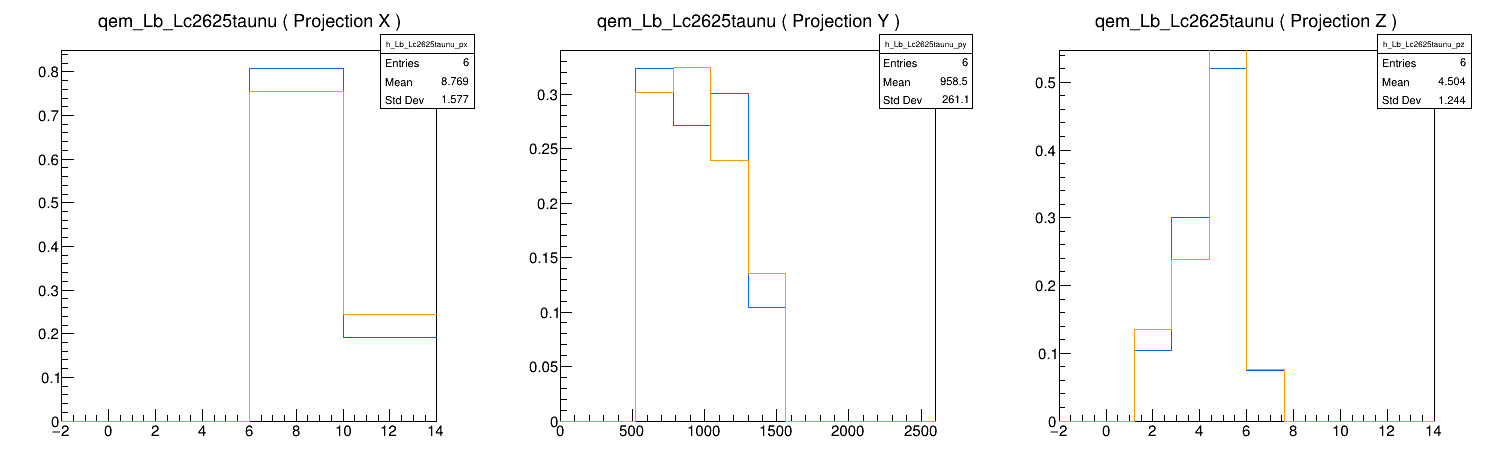

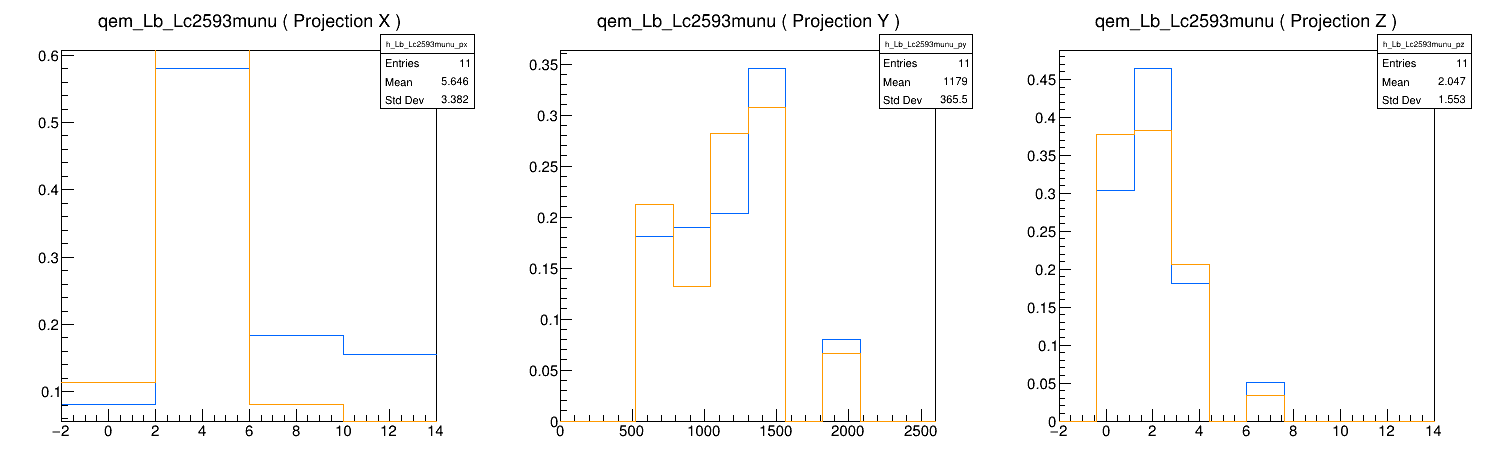

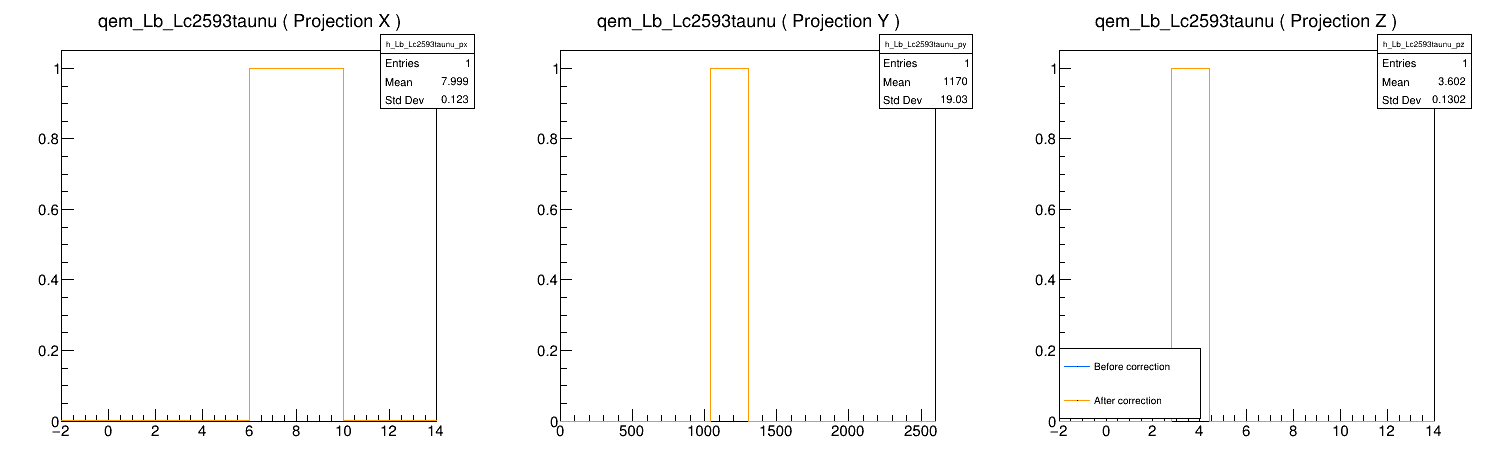

In [13]:
h2Check = {}
hNoFF = {}
c = {}

for mcsample in mcsamples:
    h2Check[mcsample] = GetHisto(f2Check,mcsample,True)
    h2Check[mcsample] = ScaleHisto(h2Check[mcsample],1)
    hNoFF[mcsample] = GetHisto(fNoFF,mcsample,False)
    hNoFF[mcsample] = ScaleHisto(hNoFF[mcsample],1)
    c[mcsample] = PlotTemplates(hNoFF[mcsample],'c_'+mcsample)
    c[mcsample] = PlotTemplatesSameCanvas(c[mcsample],h2Check[mcsample],r.kOrange-3)
    l = r.TLegend()
    l.AddEntry(hNoFF[mcsample],'Before correction')
    l.AddEntry(h2Check[mcsample],'After correction')
    l.Draw('same')
    c[mcsample].Draw()
    plotdir = 'plots/TemplateFFChecks/FitVars_'+mcsample+"_Kenr"
    c[mcsample].SaveAs(plotdir+'.png')

In [14]:
f2Check = GetFile2Check('Lcpipi', MCtype)
fNoFF = GetFileNoFF('Lcpipi', MCtype)

TemplateFiles/Histos_Lcpipi_MCfull_LbCorr_FFGstate_FFEstateL_FFEstateH.root


Info in <TCanvas::Print>: png file plots/TemplateFFChecks/FitVars_Lb_Lcmunu_Lcpipi.png has been created
Info in <TCanvas::Print>: png file plots/TemplateFFChecks/FitVars_Lb_Lctaunu_Lcpipi.png has been created
Info in <TCanvas::Print>: png file plots/TemplateFFChecks/FitVars_Lb_Lc2625munu_Lcpipi.png has been created
Info in <TCanvas::Print>: png file plots/TemplateFFChecks/FitVars_Lb_Lc2625taunu_Lcpipi.png has been created
Info in <TCanvas::Print>: png file plots/TemplateFFChecks/FitVars_Lb_Lc2593munu_Lcpipi.png has been created
Info in <TCanvas::Print>: png file plots/TemplateFFChecks/FitVars_Lb_Lc2593taunu_Lcpipi.png has been created


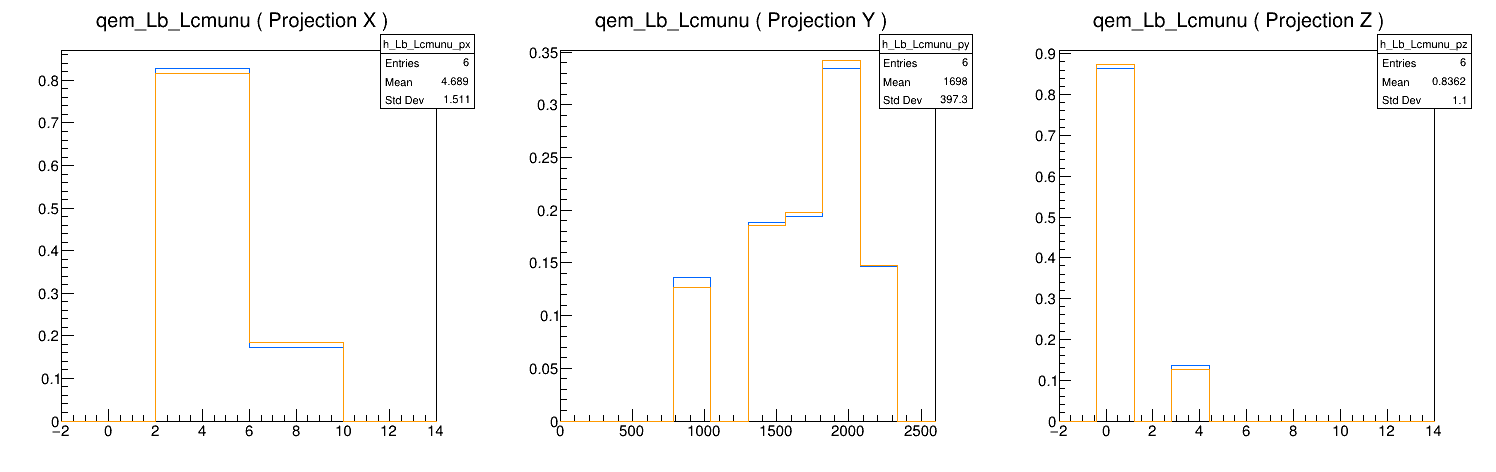

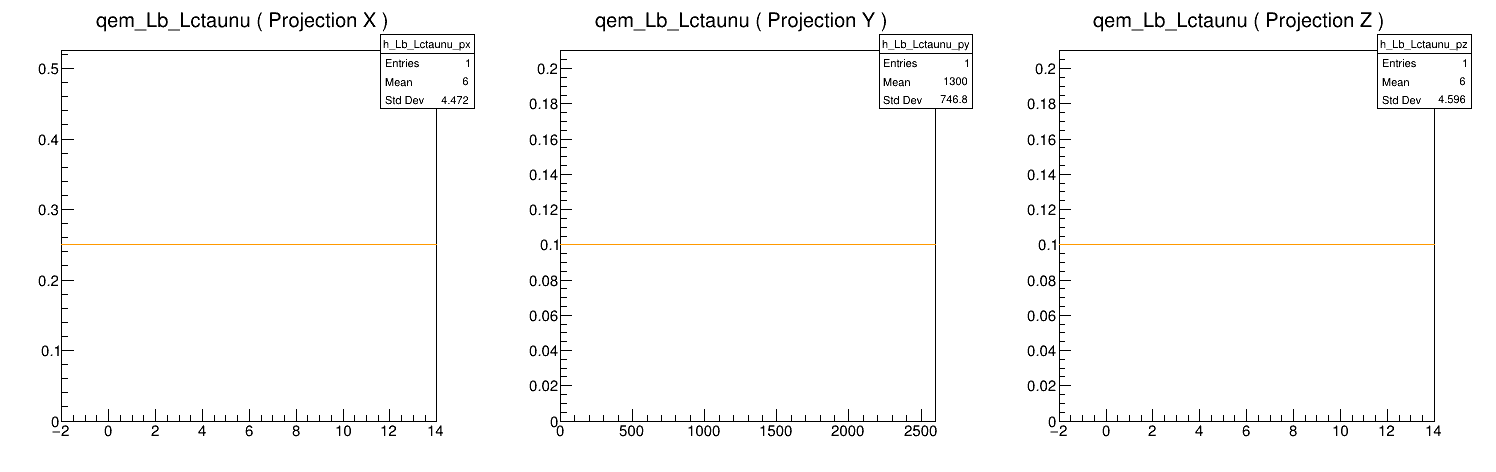

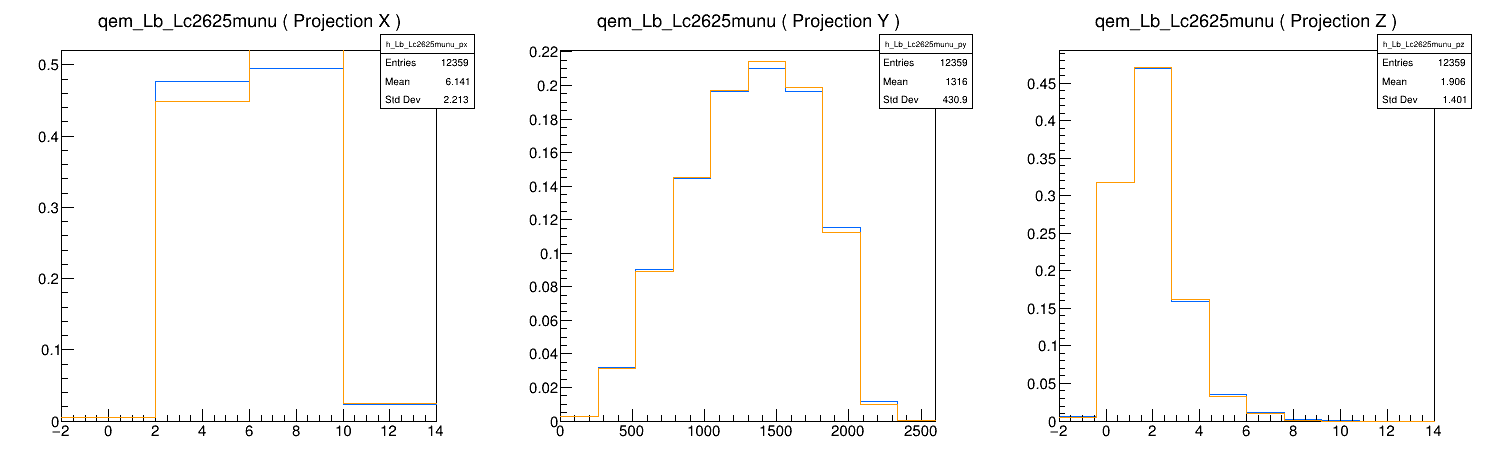

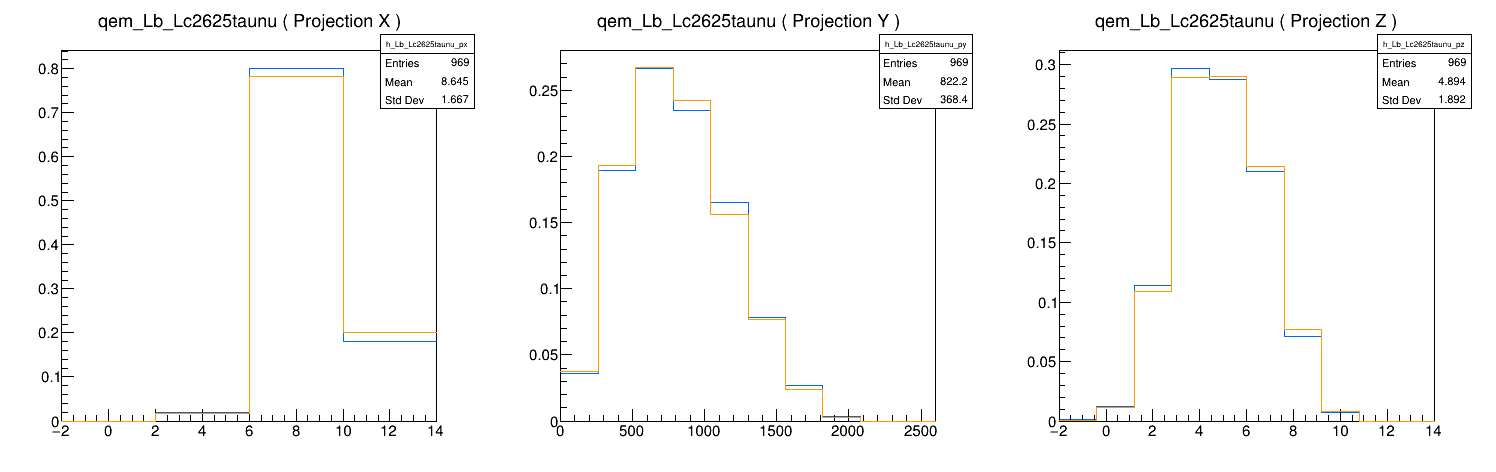

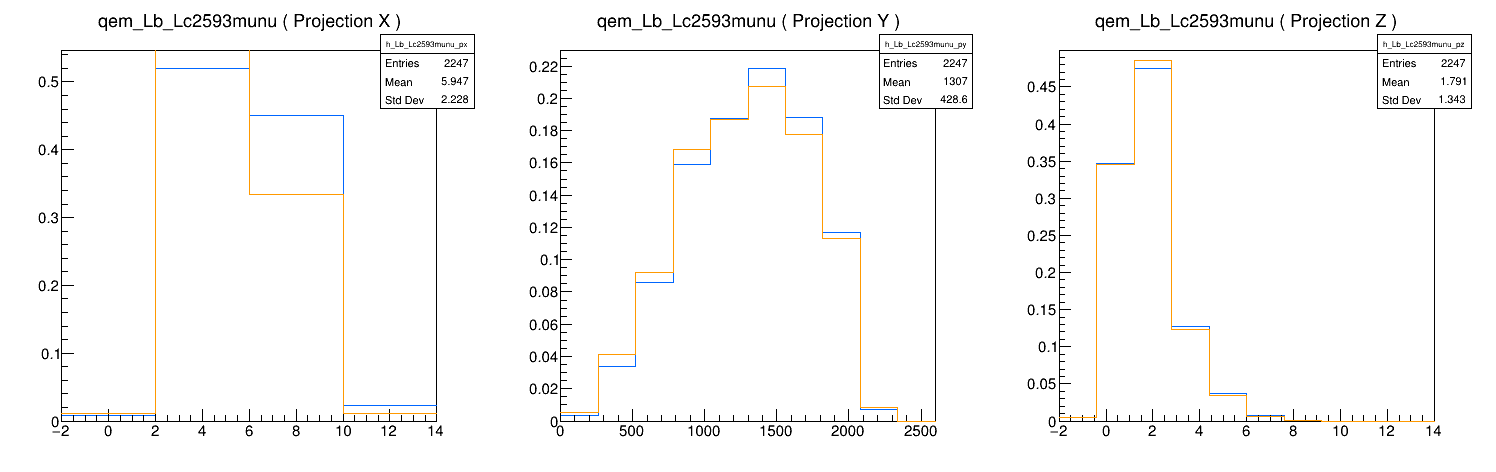

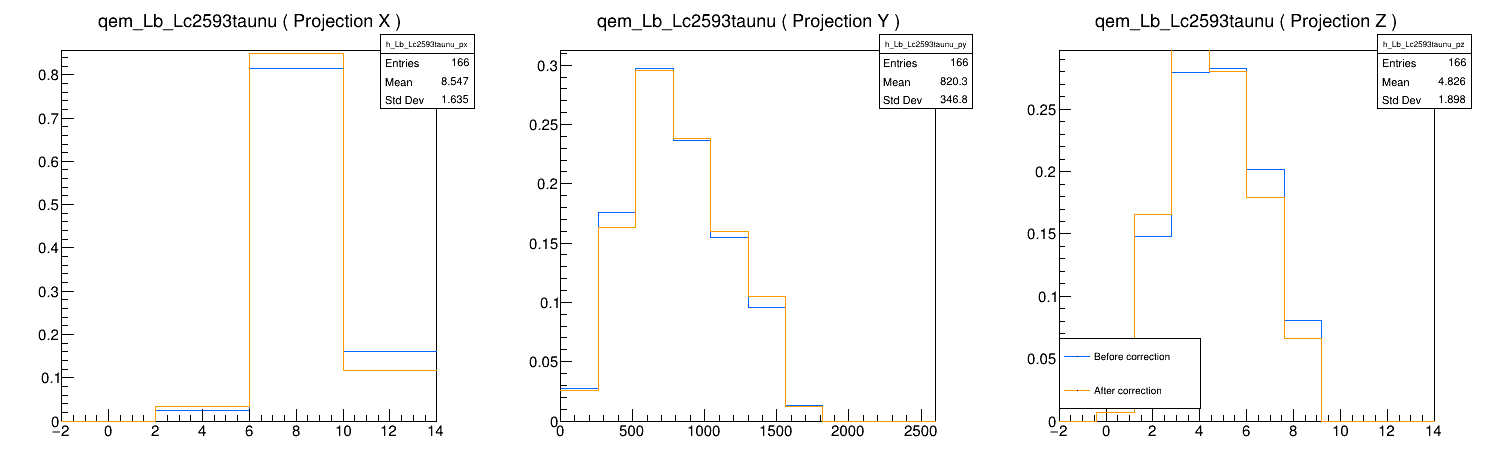

In [15]:
h2Check = {}
hNoFF = {}
c = {}

for mcsample in mcsamples:
    h2Check[mcsample] = GetHisto(f2Check,mcsample,True)
    h2Check[mcsample] = ScaleHisto(h2Check[mcsample],1)
    hNoFF[mcsample] = GetHisto(fNoFF,mcsample,False)
    hNoFF[mcsample] = ScaleHisto(hNoFF[mcsample],1)
    c[mcsample] = PlotTemplates(hNoFF[mcsample],'c_'+mcsample)
    c[mcsample] = PlotTemplatesSameCanvas(c[mcsample],h2Check[mcsample],r.kOrange-3)
    l = r.TLegend()
    l.AddEntry(hNoFF[mcsample],'Before correction')
    l.AddEntry(h2Check[mcsample],'After correction')
    l.Draw('same')
    c[mcsample].Draw()
    plotdir = 'plots/TemplateFFChecks/FitVars_'+mcsample+'_Lcpipi'
    c[mcsample].SaveAs(plotdir+'.png')